<h2><center><font color=#D40004><u>One vs One - Logistic Regression </u></font></center></h2>
<h3><center>Groupe: Mohammed NECHBA, Yassine SEDJARI, Mohammed MOUHAJIR </center></h3>
<center> 2st year Artificial Intelligence Engineering student at ENSIAS Rabat (Morocco) </center>
<br> 
<center> Prof. Abdellatif EL AFIA</center>

# <font color='green'><u> Table of Contents:</u></font> <br>

<font color = 'blue'>
    
1. [Importing/Loading & checking the data.](#1)

1. [Gradient Descent & Logistic Regression.](#2)

1. [Training & Testing for data linear separable.](#3)

1. [Training & Testing for data linear separable noise.](#4)

1. [Training & Testing for data no linear separable.](#5)


<a id = "1"></a><br>
# <font color="green"><u> I. Importing/Loading & Visualize the data:</u></font>

In [1]:
# numpy pour les opérations d'algébre linéaire sur les vecteurs et les matrices.
import numpy as np
# calculations
import math
# plotting vizualisation
import matplotlib.pyplot as plt
# pandas for read dataset
import pandas as pd
#plt.style.use('dark_background')

In [2]:
df_l_s = pd.read_csv("linearly_separable.csv")
df_l_s_n = pd.read_csv("linearly_separable_noise.csv")
df_n_l_s = pd.read_csv("no_linearly_separable.csv")

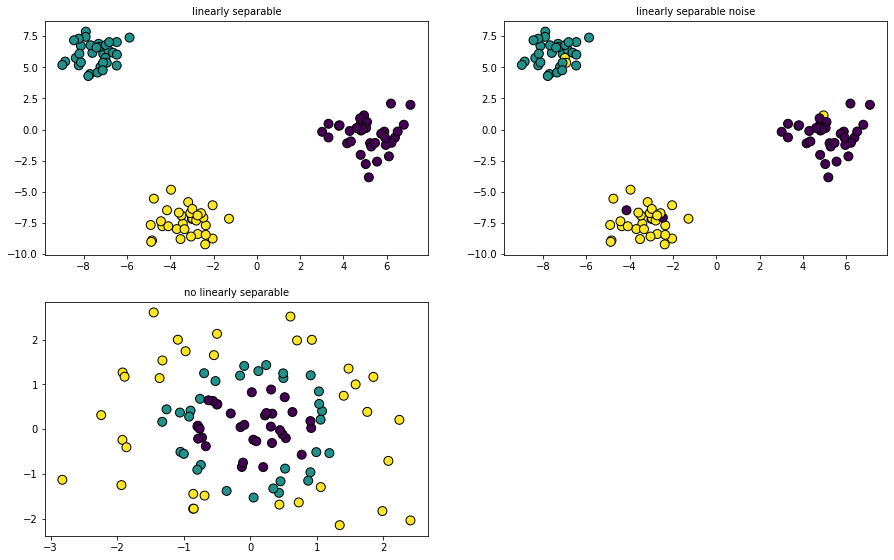

In [3]:
fig= plt.figure(figsize=(13, 13))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)

plt.subplot(321)
plt.title("linearly separable", fontsize="medium")
X1, Y1 = df_l_s[['x1','x2']].to_numpy(), df_l_s['y'].to_numpy()
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=80, edgecolor="k")

plt.subplot(322)
plt.title("linearly separable noise", fontsize="medium")
X1, Y1 = df_l_s_n[['x1','x2']].to_numpy(), df_l_s_n['y'].to_numpy()
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=80, edgecolor="k")

plt.subplot(323)
plt.title("no linearly separable", fontsize="medium")
X2, Y2 =df_n_l_s[['x1','x2']].to_numpy(), df_n_l_s['y'].to_numpy()
plt.scatter(X2[:, 0], X2[:, 1], marker="o", c=Y2, s=80, edgecolor="k")


In [4]:
def plot2D( X,y,w_list):
    x1=[]
    y1=[]
    for point in X:
        x1.append(point[1])
        y1.append(point[2])
    colors = y
    
    fig=plt.figure(figsize=(12,8))
    plt.scatter(x1, y1, s=100 ,c=colors, alpha=0.5)
    plt.xlabel('x')
    plt.ylabel('y')
    i=1
    for w in w_list:
        alpha = -w[1]/w[2]
        beta = -w[0]/w[2]
        decision_boundary = lambda x : alpha*x + beta
        if i==2:
            x2 = np.array([-2,4])
        else:
            x2 = np.array([-9,6])
            
                          
        y2 = decision_boundary(x2)
        plt.plot(x2,y2,label = "classifier "+str(i))
        i+=1
    plt.legend()


<a id = "2"></a><br>
# <font color="green"><u> II. Gradient Descent & Logistic Regression:</u></font>

> ## Gradient Descent

>> ### Quasi-Newton Method

>>> #### Pseudo-code

<div style="margin-left:1cm">
<div >
<ul>
  <li> Entrée:
  <ul>
  <li> $x^{0}$ : Réel (point initial)

  <li> $\delta$ : Réel (la tolérance)


  <li> $f$ : Fonction $\left(f: \mathbb{R}^{1} \rightarrow \mathbb{R}^{1}\right.$ et $\left.f \in C^{0}\right)$

   </ul>
  <li> Sortie: 
   <ul>    
    <li> $x^{*}$ : Réel (point de sortie)
    </ul>


  <li> Début:
   <ul>
   <li> $h=1e-2$ :
    <li> $k=0$ : 

   <li>  While(  $|\dfrac{ f( x^k + h ) - f( x^k - h ) }{  2 * h  }|> tol $  ){


<div style="margin-left:1cm">
     $ x^{k+1} = x^k - \dfrac{h * ( f( x^k + h ) - f( x^k - h ) ) }{  2 * (  f( x^k + h ) - 2 * f( x^k ) + f( x^k - h ) ) }$<br>
     $k=k+1$<br>
        </div>
}
   <li> $x^{*}=x^{k}$
   <li> RETURN $x^{*}$
      
</div>
   <ul>
   <li> Fin.
       </div>

>>> #### Implementation

In [5]:
def Quasi_Newton( x0 , f , tol = 1e-1 ) :
    """ Minimisation de la fonction scalaire d'une variable réel.
    
    Parameters
    ----------
    x0 : float
        Point initiale.
     f : callable
         La fonction objective à minimiser.
       
          ``f( x ) -> float``
          
            où ``x`` est un nombre réel 
     tol : float, optional
         Tolérance pour la terminaison. The default is 1e-3.

     Returns
     -------
     x : float
        Le résultat de l'optimisation.
     List_sol_iteration : list
                            liste des solution


    """
  
    h=1e-4
    while True:
        f0 = f( x0 )
        f1 = f( x0 - h )
        f2 = f( x0 + h )
        x = x0 - h * ( f2 - f1 ) / ( 2 * ( f2 - 2 * f0 + f1 ) )
        x0 = x
        if abs ( ( f2 - f1 ) / ( 2 * h ) ) <= tol :
            return x 

>>### Méthode de gradient

>>>### Pseudo-code

<div style="margin-left:1cm">
<div >
<ul>
  <li> Entrée:
  <ul>
  <li> $x^{0}$ : Réel (point initial)

  <li> $\delta$ : Réel (la tolérance)


  <li> $f$ : Fonction $\left(f: \mathbb{R}^{n} \rightarrow \mathbb{R}^{1}\right.$ et $\left.f \in C^{1}\right)$

   </ul>
  <li> Sortie: 
   <ul>    
    <li> $x^{*}$ : Réel (point de sortie)
    </ul>


  <li> Début:
   <ul>
   <li> $k=0$
   <li>  While( $|| \nabla f\left(x^{k}\right)||$ or $|| x^k - x^{k-1}||$){


<div style="margin-left:1cm">
Déterminer $\alpha_{k}$ tel que $\alpha_{k}=\underset{\alpha \geq 0}{\operatorname{argmin}}\left\{f\left(x^{k}-\alpha \nabla f\left(x^{k}\right)\right)\right\}$<br>

$x^{k+1}=x^{k}-\alpha_{k} \nabla f\left(x^{k}\right)$<br>

$k=k+1$<br>
       </div>
}
   <li> $x^{*}=x^{k}$
   <li> RETURN $x^{*}$
      
</div>
   <ul>
   <li> Fin.
       </div>

>>> ### Implementation

In [6]:
def methode_gradient( x0 , f ,df, X, label,z, tol =1e-3 ):
    """ Minimisation de la fonction scalaire d'une ou plusieurs variable.
    

    Parameters
    ----------
    x0 : ndarray, shape (n,)
        Point initiale.
    f : callable
         La fonction objective à minimiser.
       
          ``f( x ) -> float``
          
            x`` is an 1-D array with shape (n,)
    df :
    X :
    label :
    tol : float, optional
         Tolérance pour la terminaison. The default is 1e-3.

    Returns
    -------
     x : ndarray, shape (n,)
        Le résultat de l'optimisation.

    """
    
    grad = df(x0, X, label )
    g = lambda x , y : f( x - y * df(x, X, label ), X, label)
    while True:
        g1 = lambda y : g( x0 , y )
        y = Quasi_Newton( z , g1 ) 
        x = x0 - y * grad
        grad = df(x, X, label )
        if np.linalg.norm( grad ) <= tol or  np.linalg.norm( x-x0 ) <= tol :
            return x 
        x0 = x

> ## Logistic Regression 

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost(w, X, y):
    predictions = sigmoid(X @ w)
    predictions[predictions == 1] = 0.99 # log(1)=0 causes error in division
    error = -y * np.log(predictions) - (1 - y) * np.log(1 - predictions)
    return sum(error) / len(y);

def cost_gradient(w, X, y):
    predictions = sigmoid(X @ w);
    return X.transpose() @ (predictions - y) / len(y)

<a id = "3"></a><br>
# <font color="green"><u> III. Training & Testing for data linear separable:</u></font>

> ## Training

In [8]:
x, y = df_l_s[['x1','x2']].to_numpy(), df_l_s['y'].to_numpy()

In [9]:
numFeatures = x.shape[ 1 ] # 2 caractéristiques
numLabels = 3  # 3 class

In [ ]:
def HD(x,y):
    summ=0
    for i in range(len(x)):
        summ+=1-np.sign(x[i]*y[i])
    summ/=2
    return summ

In [ ]:
from scipy import stats, sparse
import scipy
# specify probability distribution
np.random.seed(42)
p_1 = 0.5 #=> p__1 = 1 - p_1 = 0.5
#rvs = stats.norm(loc=0, scale=1).rvs #normal dist
# create sparse random matrix with specific probability distribution/random numbers.
S = sparse.random(numLabels, numdichotomizers, density=p_1, data_rvs=np.ones)
Mc = []
mc=[]
for i in range(2**15):
    S=sparse.random(numLabels, numdichotomizers, density=p_1, data_rvs=np.ones)
    S=S.toarray()
    S=np.where(S==0,-1,1)
    maxdec=0
    decval=0
    for cw1 in S:
        for cw2 in S:
            decval+=HD(cw1,cw2)
    if(maxdec<decval):
        maxdec=decval
        mc=S
        
print("Mc that maximizes HD is :\n",mc)        

In [10]:
# Ajouter une colonne initiale de uns à notre matrice de caractéristiques pour prendre 
# en compte le terme d'interception :
X = np.ones(shape=(x.shape[0], x.shape[1] + 1))
X[:, 1:] = x

In [11]:
#  Créons un tableau pour stocker les paramètres du modèle w pour chaque classificateu
classifiers = np.zeros(shape=(numLabels, numFeatures + 1))

In [12]:
df_x=  pd.DataFrame(X,columns=['x0','x1','x2'])
df_y=pd.DataFrame(y,columns=['y'])
df =  pd.concat([df_x,df_y], axis=1)

In [13]:
# Then we’re going to train 3 binary classifiers targeted for each class inside a for loop:
k=0
for i in range(0, numLabels):
    for j in range(i+1,numLabels):
        df_i_j = df.loc[((df.y==i)+(df.y==j))]
        y_ =  df_i_j['y'].to_numpy()
        label = (y_ == j).astype(int)
        X_ =  df_i_j[['x0','x1','x2']].to_numpy()
        initial_w = np.ones(X.shape[1])
        classifiers[k, :] = methode_gradient( initial_w , cost ,cost_gradient, X_, label, 0.5, tol =1e-3 )
        k+=1

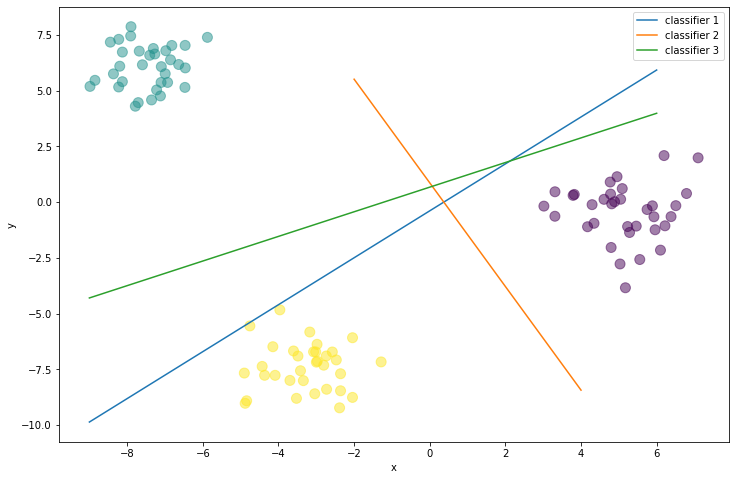

In [14]:
plot2D( X,y,classifiers)

>## Predictions

In [15]:
# Nous pouvons évaluer les estimations de probabilité de notre
# modèle optimisé pour chaque classe comme suit :
classProbabilities = sigmoid(X @ classifiers.transpose())

In [16]:
predictions=[]
for val in classProbabilities:
    if(val[0]<0.5 and val[1]<0.5):
        predictions.append(0)
    elif val[1]>0.5 and val[2]>0.5:
        predictions.append(2)
    else :
        predictions.append(1)

>## Accuracy

In [17]:
print("Training accuracy:", str(100 * np.mean(predictions == y)) + "%")

Training accuracy: 100.0%


<a id = "4"></a><br>
# <font color="green"><u> IV. Training & Testing for data linear separable noise:</u></font>

> ## Training

In [18]:
x, y = df_l_s_n[['x1','x2']].to_numpy(), df_l_s_n['y'].to_numpy()

In [19]:
numFeatures = x.shape[ 1 ] # 2 caractéristiques
numLabels = 3  # 3 class

In [20]:
# Ajouter une colonne initiale de uns à notre matrice de caractéristiques pour prendre 
# en compte le terme d'interception :
X = np.ones(shape=(x.shape[0], x.shape[1] + 1))
X[:, 1:] = x

In [21]:
#  Créons un tableau pour stocker les paramètres du modèle w pour chaque classificateu
classifiers = np.zeros(shape=(numLabels, numFeatures + 1))

In [22]:
from sklearn import preprocessing
X_normalize = preprocessing.normalize(X, norm='l2')
df_x=  pd.DataFrame(X_normalize,columns=['x0','x1','x2'])


In [23]:
df_y=pd.DataFrame(y,columns=['y'])
df =  pd.concat([df_x,df_y], axis=1)

In [24]:
# Then we’re going to train 3 binary classifiers targeted for each class inside a for loop:
k=0
for i in range(0, numLabels):
    for j in range(i+1,numLabels):
        df_i_j = df.loc[((df.y==i)+(df.y==j))]
        y_ =  df_i_j['y'].to_numpy()
        label = (y_ == j).astype(int)
        X_ =  df_i_j[['x0','x1','x2']].to_numpy()
        initial_w = np.ones(X.shape[1])
        classifiers[k, :] = methode_gradient( initial_w , cost ,cost_gradient, X_, label, 0.1, tol =1e-2 )
        k+=1

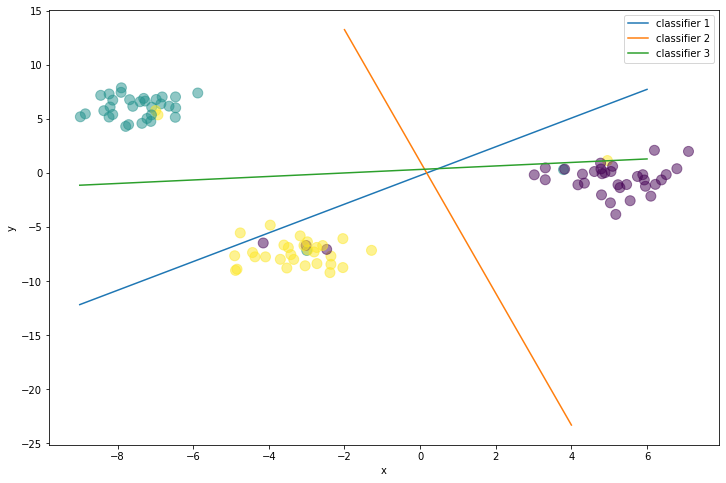

In [25]:
plot2D( X,y,classifiers)

>## Predictions

In [26]:
# Nous pouvons évaluer les estimations de probabilité de notre
# modèle optimisé pour chaque classe comme suit :
classProbabilities = sigmoid(X_normalize @ classifiers.transpose())

In [27]:
predictions=[]
for val in classProbabilities:
    if(val[0]<0.5 and val[1]<0.5):
        predictions.append(0)
    elif val[1]>0.5 and val[2]>0.5:
        predictions.append(2)
    else :
        predictions.append(1)

>## Accuracy

In [28]:
print("Training accuracy:", str(100 * np.mean(predictions == y)) + "%")

Training accuracy: 92.0%


<a id = "5"></a><br>
# <font color="green"><u> V. Training & Testing for data no linear separable :</u></font>

> ## Training

In [29]:
x, y = df_n_l_s[['x1','x2']].to_numpy(), df_l_s_n['y'].to_numpy()

In [30]:
numFeatures = x.shape[ 1 ] # 2 caractéristiques
numLabels = 3  # 3 class

In [31]:
# Ajouter une colonne initiale de uns à notre matrice de caractéristiques pour prendre 
# en compte le terme d'interception :
X = np.ones(shape=(x.shape[0], x.shape[1] + 1))
X[:, 1:] = x

In [32]:
#  Créons un tableau pour stocker les paramètres du modèle w pour chaque classificateu
classifiers = np.zeros(shape=(numLabels, numFeatures + 1))

In [33]:
from sklearn import preprocessing
X_normalize = preprocessing.normalize(X, norm='l2')
df_x=  pd.DataFrame(X_normalize,columns=['x0','x1','x2'])


In [34]:
df_y=pd.DataFrame(y,columns=['y'])
df =  pd.concat([df_x,df_y], axis=1)

In [35]:
# Then we’re going to train 3 binary classifiers targeted for each class inside a for loop:
k=0
for i in range(0, numLabels):
    for j in range(i+1,numLabels):
        df_i_j = df.loc[((df.y==i)+(df.y==j))]
        y_ =  df_i_j['y'].to_numpy()
        label = (y_ == j).astype(int)
        X_ =  df_i_j[['x0','x1','x2']].to_numpy()
        initial_w = np.ones(X.shape[1])
        classifiers[k, :] = methode_gradient( initial_w , cost ,cost_gradient, X_, label, 0.1, tol =1e-2 )
        k+=1

>## Predictions

In [36]:
# Nous pouvons évaluer les estimations de probabilité de notre
# modèle optimisé pour chaque classe comme suit :
classProbabilities = sigmoid(X_normalize @ classifiers.transpose())

In [37]:
predictions=[]
for val in classProbabilities:
    if(val[0]<0.5 and val[1]<0.5):
        predictions.append(0)
    elif val[1]>0.5 and val[2]>0.5:
        predictions.append(2)
    else :
        predictions.append(1)

>## Accuracy

In [38]:
print("Training accuracy:", str(100 * np.mean(predictions == y)) + "%")

Training accuracy: 40.0%
